# Iris data set exploration and analysis 

***
### Module: Fundamentals of Data Analsis
### HDip in Data Analysis at ATU 

#### Author: Shane Keenan 
#### Submission due date: 22/12/2023
#### Status: ongoing 

***

### Project description (from Lecturer Ian McLoughlin )

• The project is to create a notebook investigating the variables and
data points within the well-known iris flower data set associated
with Ronald A Fisher.

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).

• In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.

• Select, demonstrate, and explain the most appropriate summary
statistics to describe each variable.

• Select, demonstrate, and explain the most appropriate plot(s) for
each variable.

• The notebook should follow a cohesive narrative about the data
set.

***

#### let's start by importing the necessary python packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from PIL import Image

#### and have a look at the Iris flowers themselves to give the data set some context

Text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)')

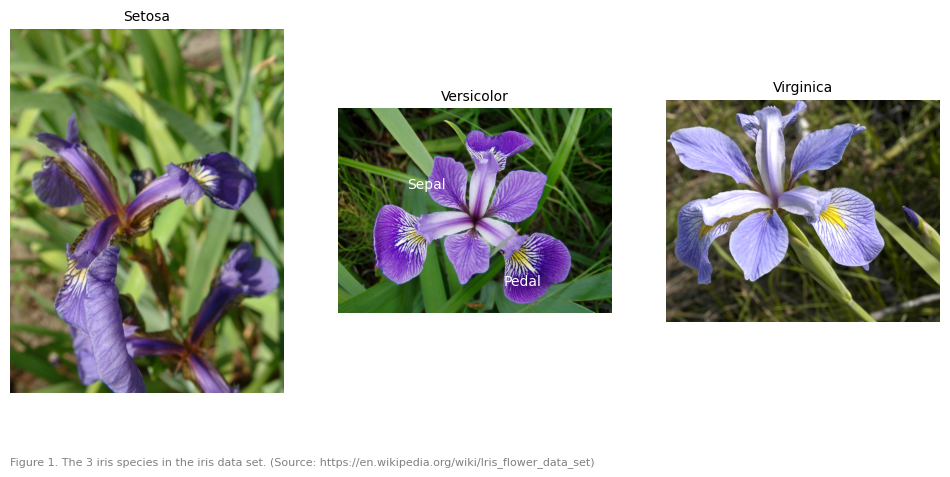

In [2]:
image1 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_setosa.jpg")
image2 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_versicolor.jpg")
image3 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_virginica.jpg")
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)  
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title("Setosa", fontsize=10)
ax2.set_title("Versicolor", fontsize=10)
ax3.set_title("Virginica",fontsize=10 )
ax2.text(500, 500, 'Sepal', color='white', fontsize=10, ha='left', va='top', alpha=1)
ax2.text(1200, 1200, 'Pedal', color='white', fontsize=10, ha='left', va='top', alpha=1)
ax1.text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)', color='black', fontsize=8, ha='left', va='top', alpha=0.5)
#plt.arrow(2,5,4,2,width=.3, edgecolor='green',facecolor='red',linestyle='--',linewidth=3)

#### • In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

#### OK to start lets import the data set as a DataFrame and display 

In [3]:
''' download iris.csv data file and change this path ''' #read in the csv file from local drive 
data = pd.read_csv("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\iris.csv")
data #  displays the top and bottom 5 rows and gives the shape of the data - 150 rows x 5 columns 

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.dtypes # what are the python data types 

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

### Data set description

The Iris data set is a multivariate data set collated by British statistician and biologist Ronald Fisher. It was first published in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor) giving a total of 150 rows of data.


There are 5 columns of data;
4 columns containing measurements of the various flower characteractics, *sepal length [cm]*, *sepal width [cm]*, *petal length [cm]* and *petal width [cm]*.
These are numberical real varaibles with precision to one decimal place and are represented by floating point numbers in python (float64). In statistical terms, where scale of measurement refers to the way variables are defined and categorized (in statistics: *nominal*, *ordinal*, *interval*, and *ratio*), these variables are Ratio scale as they have a true zero point (0 cm) and allow for differences between values to be determined. 

The 5th column specifies the species of Iris. In which there are 3 species of Iris. This is categorical varaible represented as an object in python. In statical terms, scale of measurement, it is a nominal value. Used simply to label the variable and has no quantitative value. 

The 3 species of Iris are shown in figure 1 along with labels of the pedal and sepal parts of the Iris.
Note: the sepal is defined as any of the outer parts of a flower that enclose and protect the unopened flower bud and for these Iris are coloured similarly to the pedal (i didn't know what th sepal was!).

In Python, we use the pandas library to store the variables of both types (numerical and cattegorical) in to a `DataFrame`. From here we can easily maniplate the data and handle the different data types together. 


Reference: 

[1] Types of Variable: https://statistics.laerd.com/statistical-guides/types-of-variable.php

[2] Introduction to measurement and statistics. https://lsc.cornell.edu/wp-content/uploads/2016/01/Intro-to-measurement-and-statistics.pdf

[3] Levels of Measurement | Nominal, Ordinal, Interval and Ratio: https://www.scribbr.com/statistics/levels-of-measurement/




In [5]:
# tidy up the data - rename the columns with formated titles
newcols={"sepallength":"Sepal_Length_[cm]","sepalwidth":"Sepal_Width_[cm]","petallength":"Petal_Length_[cm]","petalwidth":"Petal_Width_[cm]","class":"Species"}
data = data.rename(columns=newcols) # rename columns
data

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm],Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



### • Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

The most apppropriate summary statistics to describe the numerical quantitative variables (*sepal length [cm]*, *sepal width [cm]*, *petal length [cm]* and *petal width [cm]*) in the Iris dataset would be to determine the *mean*, *standard deviation*, *minimum and maximum* and *quartiles*. 

For the *categorical variable* (*species*), statistics we can determine is *Frequency* and *proportionality* (percentage of each category)

 .describe() generates all the summary statistics for the whole data set 

In [6]:
data.describe()

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


However what is more useful is to generate the summary statistics for the individual species of Iris. 

In [7]:
data[data['Species'] == 'Iris-setosa'].describe().round(2)
# rounding in pandas https://technicqa.com/how-do-i-limit-decimal-places-in-pandas/

#list with column names for plotting axes 
#cols = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']
#cols[1]

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00,50.00,50.00,50.00
mean,5.01,3.42,1.46,0.24
std,0.35,0.38,0.17,0.11
min,4.30,2.30,1.00,0.10
25%,4.80,3.12,1.40,0.20
50%,5.00,3.40,1.50,0.20
75%,5.20,3.68,1.58,0.30
max,5.80,4.40,1.90,0.60


In [8]:
data[data['Species'] == 'Iris-virginica'].describe().round(2)

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00,50.00,50.00,50.00
mean,6.59,2.97,5.55,2.03
std,0.64,0.32,0.55,0.27
min,4.90,2.20,4.50,1.40
25%,6.22,2.80,5.10,1.80
50%,6.50,3.00,5.55,2.00
75%,6.90,3.18,5.88,2.30
max,7.90,3.80,6.90,2.50


In [9]:
data[data['Species'] == 'Iris-versicolor'].describe().round(2)

,Sepal_Length_[cm],Sepal_Width_[cm],Petal_Length_[cm],Petal_Width_[cm]
count,50.00,50.00,50.00,50.00
mean,5.94,2.77,4.26,1.33
std,0.52,0.31,0.47,0.20
min,4.90,2.00,3.00,1.00
25%,5.60,2.52,4.00,1.20
50%,5.90,2.80,4.35,1.30
75%,6.30,3.00,4.60,1.50
max,7.00,3.40,5.10,1.80


### Boxplots - great way to visualise summary statistics 
Here we see the data plotted horizontally for each species against the four attributes. The plot shows the range, interquartile range, median, outliers, and all quartiles of the data set.
The red line indicates the median of the data, the green triangle the mean value, open circles indcicate outlier points(note some don't have outliers)

I stuck in all the bells and whistles for these box plots... 

This website gives a nice description of the box plot and its features.
https://statisticsbyjim.com/basics/interquartile-range/

![image info](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2019/01/boxplot_pdf.png?w=437&ssl=1)

Text(0.5, 1.0, 'Pedal width distribution for Iris species')

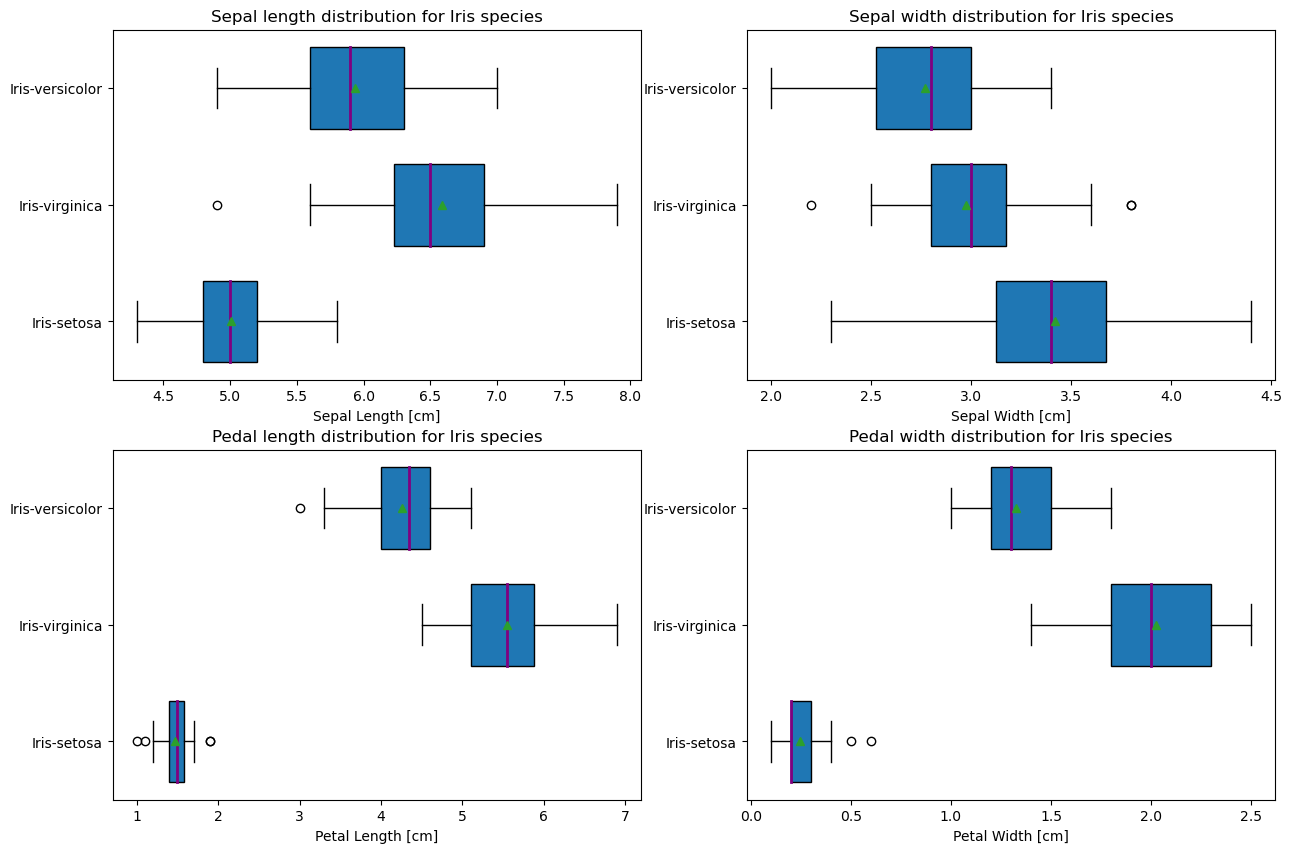

In [10]:
#list with column names for plotting axes 
cols = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']
#cols[1]
#box plot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
A = [data['Sepal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Length_[cm]'][data.Species == 'Iris-versicolor']]
B = [data['Sepal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Width_[cm]'][data.Species == 'Iris-versicolor']]
C = [data['Petal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Length_[cm]'][data.Species == 'Iris-versicolor']]
D = [data['Petal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Width_[cm]'][data.Species == 'Iris-versicolor']]
ax[0, 0].boxplot(A, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'),vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[0, 0].set_title('Sepal length distribution for Iris species')
ax[0, 0].set_xlabel(cols[0])
ax[0, 1].boxplot(B, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[0, 1].set_xlabel(cols[1])
ax[0, 1].set_title('Sepal width distribution for Iris species')
ax[1, 0].boxplot(C,labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[1, 0].set_xlabel(cols[2])
ax[1, 0].set_title('Pedal length distribution for Iris species')
ax[1, 1].boxplot(D, labels=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), vert=False,widths = 0.7, patch_artist=True, showmeans=True, meanprops={'linewidth': 2, 'color': 'red'},medianprops={'linewidth': 2, 'color': 'purple'})
ax[1, 1].set_xlabel(cols[3])
ax[1, 1].set_title('Pedal width distribution for Iris species')

Comment on the distributions 

Ploting histograms can visualise the frequency of variable distribtion 

Text(0, 0.5, 'Frequency')

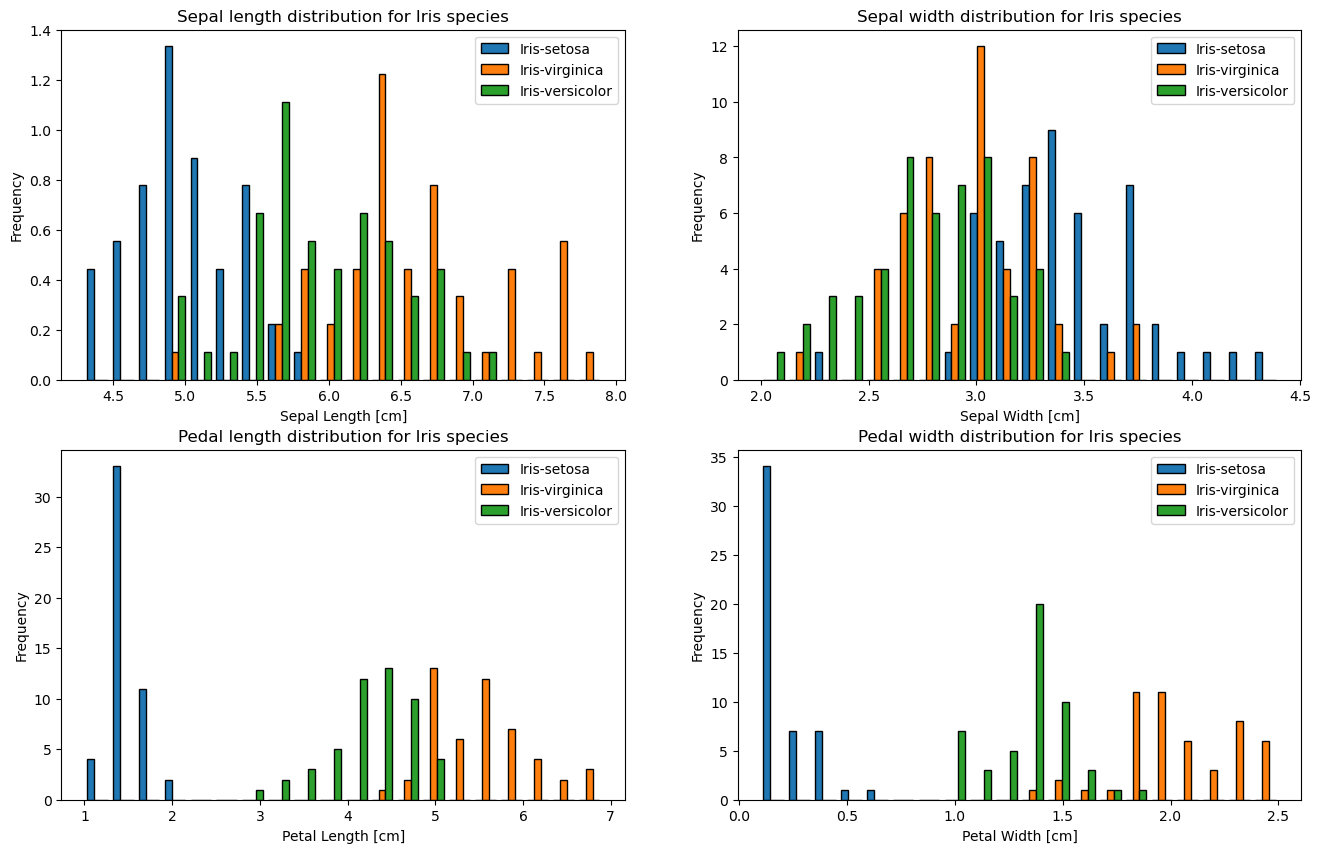

In [16]:
# histogram 
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
A = [data['Sepal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Length_[cm]'][data.Species == 'Iris-versicolor']]
B = [data['Sepal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Sepal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Sepal_Width_[cm]'][data.Species == 'Iris-versicolor']]
C = [data['Petal_Length_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Length_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Length_[cm]'][data.Species == 'Iris-versicolor']]
D = [data['Petal_Width_[cm]'][data.Species == 'Iris-setosa'], data['Petal_Width_[cm]'][data.Species == 'Iris-virginica'], data['Petal_Width_[cm]'][data.Species == 'Iris-versicolor']]
ax[0, 0].hist(A, bins = 20, density=True, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black')
ax[0, 0].set_title('Sepal length distribution for Iris species')
ax[0, 0].legend(loc='upper right')
ax[0, 0].set_xlabel(cols[0])
ax[0, 0].set_ylabel('Frequency')
ax[0, 1].hist(B, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
ax[0, 1].set_title('Sepal width distribution for Iris species')
ax[0, 1].legend(loc='upper right')
ax[0, 1].set_xlabel(cols[1])
ax[0, 1].set_ylabel('Frequency')
ax[1, 0].hist(C, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
ax[1, 0].set_title('Pedal length distribution for Iris species')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_xlabel(cols[2])
ax[1, 0].set_ylabel('Frequency')
ax[1, 1].hist(D, bins = 20, label=('Iris-setosa', 'Iris-virginica', 'Iris-versicolor'), edgecolor='black',)
ax[1, 1].set_title('Pedal width distribution for Iris species')
ax[1, 1].legend(loc='upper right')
ax[1, 1].set_xlabel(cols[3])
ax[1, 1].set_ylabel('Frequency')

For the *categorical variable* (*species*), statistics we can determine is *frequency* and *proportionality* (percentage of each category)

using the .value_counts() function we can determine the frequency of the various species and in turn determine the proportionality - 
for the Iris data set we have a count of 50 each *species* and therefore they are each equally represented in the dataset (~ 33.33 %) 

In [44]:
data.value_counts("Species")
# check the quality of the data - missing data etc. 
#data.isnull().sum()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### • Select, demonstrate, and explain the most appropriate plot(s) for each variable.

In addition to the box and histogram plots we have seen in the previous sections, Scatter plots are used to visualize the relationship between two variables.  

The seaborn.pairplot() function allows us to visualise all variables in one nice compact plot. 

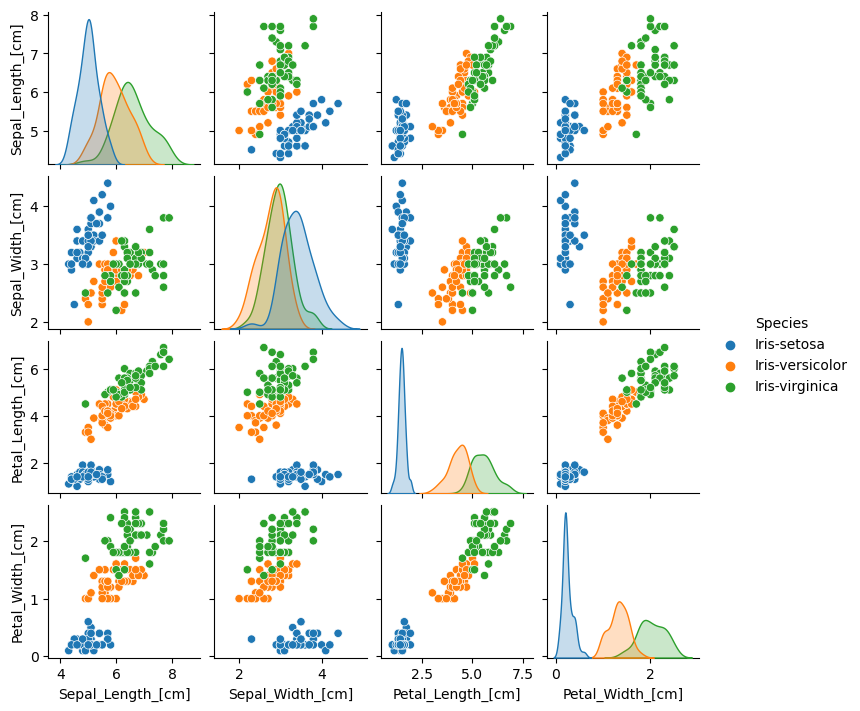

In [42]:
g = sns.pairplot(data,hue="Species", height=1.8)

The correlation between these variables can be further explored using data.corr() function and heatmaps(). This shows the correlation coefficient R between the four features of the iris flowers: sepal length, sepal width, petal length, and petal width. The better the correlation the higher the number show up to 1 which represents a perfect correlation.  

C:\Users\shane\AppData\Local\Temp\ipykernel_21020\2570687450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidth=5,fmt='.3f')


<Axes: >

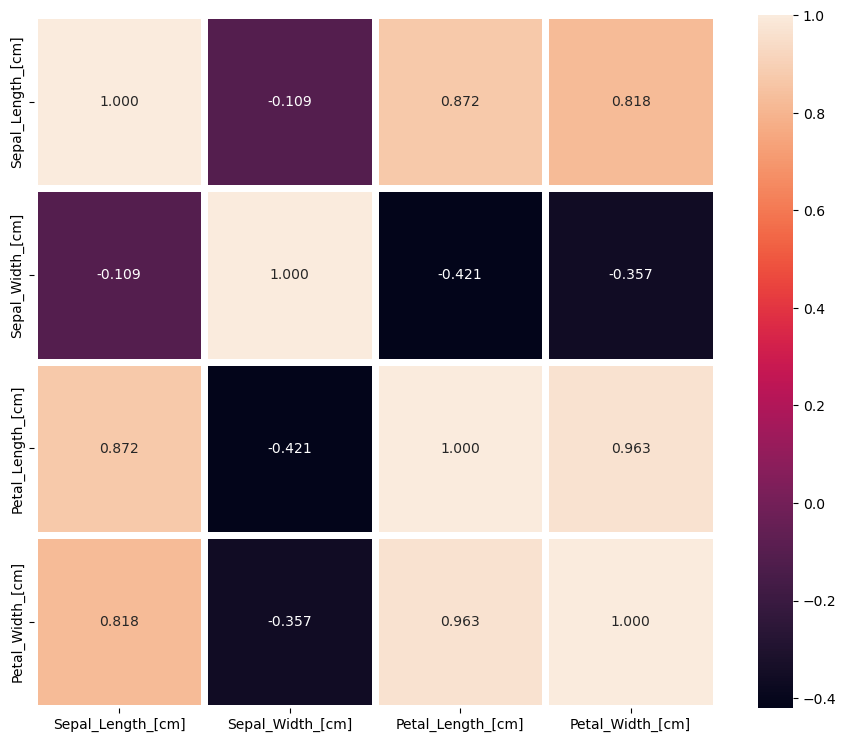

In [51]:
plt.figure(figsize=(11, 9))
sns.heatmap(data.corr(), annot=True, linewidth=5,fmt='.3f')
# https://stackoverflow.com/questions/41519991/how-to-make-seaborn-heatmap-larger-normal-size
# https://stackoverflow.com/questions/39409866/correlation-heatmap

However the correlation coefficients shown in the heat map above is not specific to any particular species of Iris. We can use groupby() function which can then display heat maps for each Iris species.  

<Axes: ylabel='Species-None'>

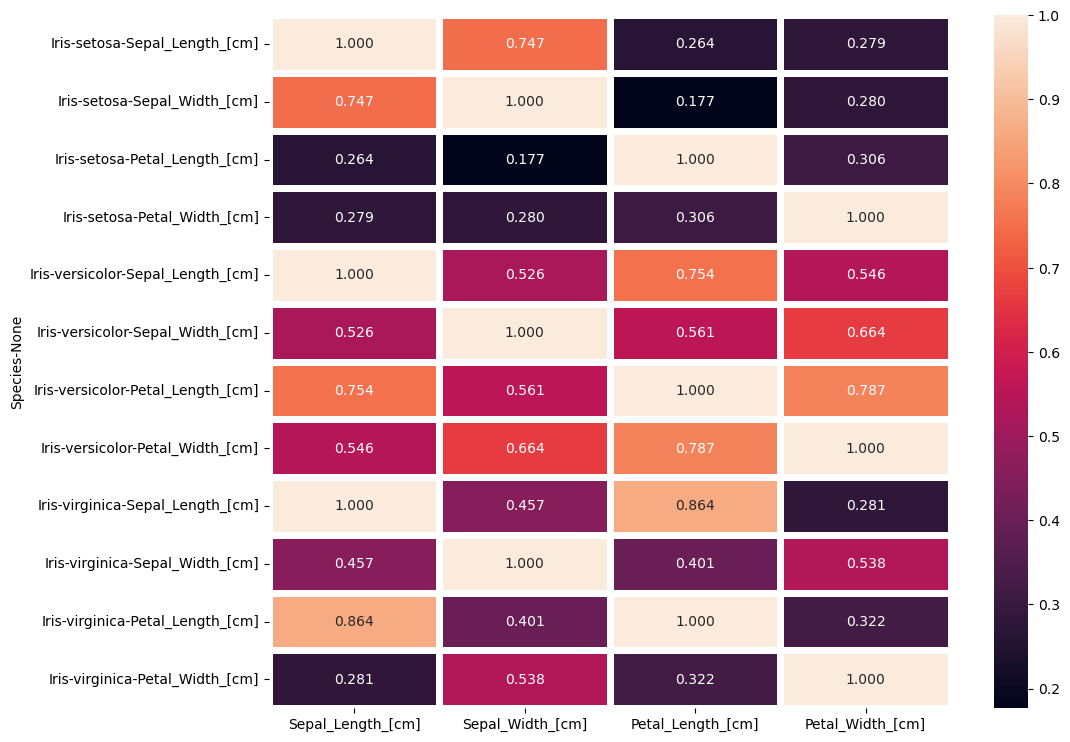

In [50]:
corr = data.groupby('Species').corr()
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, linewidth=5, fmt='.3f')